# Intro: Basic Loan

- Let's assume we lend out 1000 dollars for 12 months
    - The borrower pays us 12 payments of 100 dollars for the next twelve months
        - The loan payments are shown below

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_basic_loan = pd.DataFrame(columns = list(range(13)))
df_basic_loan.loc['Cash Outflows'] = 0
df_basic_loan.loc['Cash Outflows', 0] = -1000
df_basic_loan.loc['Cash Inflows'] = 100
df_basic_loan.loc['Cash Inflows', 0] = 0
df_basic_loan.loc['Net Cashflows'] = df_basic_loan.loc['Cash Outflows'] + df_basic_loan.loc['Cash Inflows']
df_basic_loan

,0,1,2,3,4,5,6,7,8,9,10,11,12
Cash Outflows,-1000,0,0,0,0,0,0,0,0,0,0,0,0
Cash Inflows,0,100,100,100,100,100,100,100,100,100,100,100,100
Net Cashflows,-1000,100,100,100,100,100,100,100,100,100,100,100,100


- So, to calculate the return from our loan:

$$
\text{Annual Return} = \frac{\text{Total Cash Collected}}{\text{Total Cash Lent Out}} - 1
$$

- We know we lent out 1000, and we can take the sum of the Cash Inflows row to get the total cash collected

In [3]:
df_basic_loan.loc['Cash Inflows'].sum()

1200

- Therefore:

$$
\text{Annual Return} = \frac{1200}{1000} - 1 = 20\%
$$

_____

# Scenario 1: Lending out collections from month 1

- Now, let's say we take the 100 dollars we collect in month 1, and immediately lend it out earning 10 dollars per month for the next 12 months
    - **Note**: Because this loan was originated one month later, its last payment will be collected one month after the last payment from our 1000 dollar loan

In [4]:
df_scenario_1 = pd.DataFrame(columns = list(range(14)))
df_scenario_1.loc['Cash Outflows (Loan 1)'] = 0
df_scenario_1.loc['Cash Outflows (Loan 1)', 0] = -1000
df_scenario_1.loc['Cash Inflows (Loan 1)'] = 100
df_scenario_1.loc['Cash Inflows (Loan 1)',0] = 0
df_scenario_1.loc['Cash Inflows (Loan 1)',13] = 0

df_scenario_1.loc['Cash Outflows (Loan 2)'] = 0
df_scenario_1.loc['Cash Outflows (Loan 2)', 1] = -100
df_scenario_1.loc['Cash Inflows (Loan 2)'] = 10
df_scenario_1.loc['Cash Inflows (Loan 2)',0] = 0
df_scenario_1.loc['Cash Inflows (Loan 2)',1] = 0

df_scenario_1.loc['Net Cashflows'] = df_scenario_1.sum()

df_scenario_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Cash Outflows (Loan 1),-1000,0,0,0,0,0,0,0,0,0,0,0,0,0
Cash Inflows (Loan 1),0,100,100,100,100,100,100,100,100,100,100,100,100,0
Cash Outflows (Loan 2),0,-100,0,0,0,0,0,0,0,0,0,0,0,0
Cash Inflows (Loan 2),0,0,10,10,10,10,10,10,10,10,10,10,10,10
Net Cashflows,-1000,0,110,110,110,110,110,110,110,110,110,110,110,10


- First thing we note is that the net cashflow in month 1 is zero
    - This is as we planned
        - We're not using any **new** money to originate loans, we're just **reinvesting** the collections from our first loan
            - We'll see that this compounds our return

- So, calculating the return for this scenario
    - We lent out a total of 1000 dollars
    - We take the sume of the Net Cashflows from month 1 onwards to get the total amount collected

In [5]:
df_scenario_1.loc['Net Cashflows', 1:].sum()

1220

- So we collected 1220 in 13 months on an investment of 1000
    - Our annual return is equal to:
    
$$
\text{Annual Return} = \left ( \frac{1220}{1000} \right )^{\frac{12}{13}}-1 = 20.14\%
$$

- This means that by reinvesting just one collection into new originations, we earned an extra 0.14% annually

_____

# Scenario 3: Reinvesting all collections from year 1

- This time, instead of only reinvesting the collections from month 1, we'll do it for each month 1-12
    - **Note**: this problem becomes more confusing, since the collection amount increases each month, therefore we lend out more each month, and the returns keep compounding

In [6]:
df_scenario_2 = pd.DataFrame(columns = range(13))
df_scenario_2.loc['CF Out (L1)'] = 0
df_scenario_2.loc['CF Out (L1)',0] = -1000
df_scenario_2.loc['CF In (L1)'] = 100
df_scenario_2.loc['CF In (L1)',0] = 0

for month in range(1,13):
    total_collected = df_scenario_2.iloc[:,month].sum()
    monthly_amount = total_collected/10
    df_temp = pd.DataFrame(columns = range(month, 13+month))
    df_temp.loc['CF Out (L{})'.format(month+1)] = 0
    df_temp.loc['CF Out (L{})'.format(month+1), month] = -total_collected
    df_temp.loc['CF In (L{})'.format(month+1)] = monthly_amount
    df_temp.loc['CF In (L{})'.format(month+1), month] = 0
    df_scenario_2 = df_scenario_2.T.join(df_temp.T, how='outer').T.fillna(0)
df_scenario_2.loc['Net CF'] = df_scenario_2.sum()

In [7]:
df_scenario_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
CF Out (L1),"-1,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CF In (L1),0.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CF Out (L2),0.00,-100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CF In (L2),0.00,0.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CF Out (L3),0.00,0.00,-110.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CF In (L3),0.00,0.00,0.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CF Out (L4),0.00,0.00,0.00,-121.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CF In (L4),0.00,0.00,0.00,0.00,12.10,12.10,12.10,12.10,12.10,12.10,12.10,12.10,12.10,12.10,12.10,12.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CF Out (L5),0.00,0.00,0.00,0.00,-133.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CF In (L5),0.00,0.00,0.00,0.00,0.00,13.31,13.31,13.31,13.31,13.31,13.31,13.31,13.31,13.31,13.31,13.31,13.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


- Again, we notice that the net cash flows are zero for months 1-12

- We take the sum of the Net CF row to see how much we collected **above the 1000 we originally lent out**

In [8]:
df_scenario_2.loc['Net CF'].sum()

627.6856753441997

- So we calculate our annual return as:

$$
\text{Annual Return} = \left ( \frac{1627.69}{1000} \right )^{\frac{1}{2}}-1 = 27.6\%
$$

_____

# Generalizing reinvestments

- We can create a plot to show the growth of the annual return as we make more reinvestments

In [9]:
df_plot = pd.DataFrame(columns = range(13))
df_plot.loc['CF Out (L1)'] = 0
df_plot.loc['CF Out (L1)',0] = -1000
df_plot.loc['CF In (L1)'] = 100
df_plot.loc['CF In (L1)',0] = 0

for month in range(1,37):
    total_collected = df_plot.iloc[:,month].sum()
    monthly_amount = total_collected/10
    df_temp = pd.DataFrame(columns = range(month, 13+month))
    df_temp.loc['CF Out (L{})'.format(month+1)] = 0
    df_temp.loc['CF Out (L{})'.format(month+1), month] = -total_collected
    df_temp.loc['CF In (L{})'.format(month+1)] = monthly_amount
    df_temp.loc['CF In (L{})'.format(month+1), month] = 0
    df_plot = df_plot.T.join(df_temp.T, how='outer').T.fillna(0)

In [10]:
def f(loan_amount, n_reinvesments):
    total = 0
    for i in range(n_reinvesments+1) :
        total += 1000*0.2*(0.1**i)
    return total

In [11]:
df_annual_returns = pd.DataFrame(columns = ['Annual Return'])

for month in range(37):
    n_rows = 2*(month + 1)
    df_temp = df_plot.iloc[:n_rows]
    net_cf = df_temp.sum().sum()
    denominator = month + 12
    annual_return = ((1000+net_cf)/1000)**(12/denominator)
    df_annual_returns.loc[month, 'Annual Return'] = annual_return

Text(0.5,0,'N Reinvestments')

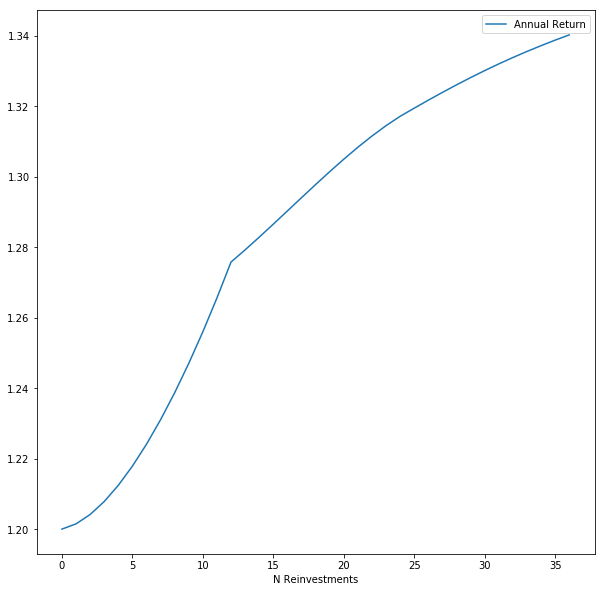

In [14]:
df_annual_returns.plot(figsize=(10,10))
plt.xlabel('N Reinvestments')

_____

# The Scenario

- Now, to put this into context, we want to take a 1m dollar investment from an investor and use the cash to originate loans
    - Our investment agreement has a hurdle rate return of 12%
        - This means that the portfolio must achieve a return of 12%, but anything above 12% comes to us as a performance fee
            - We want to know: **how long do we need to reinvest to achieve our return?**

- Now, we probably notice right away that if we lend out 1m dollars and get the 10% collection per month as we had above, we can achieve our hurdle rate return **without any reinvestment at all**
    - What we're trying to figure out, however, is how this works for **various** collections rates
        - Furthermore, we'll want to extend our analysis to non-constant collections curves
            - i.e. we collect 20% for the first two months, then between 5-10% for the remaining months

### What we'll do here

- First, we'll plot the growth our previous pool for various numbers of reinvestments
    - Next, we'll loop through different collection percentages and see how many reinvestments are required to achieve the target return

In [28]:
df_1 = 1000*df_scenario_2.copy()
df_1 = df_1.iloc[:-1]
#Since we get an investment of 1m, we can net out the negative cash outflow from 
df_1.iloc[0,0] = 0

for i in range(len(df_1)//2):
    n_rows = 2*(i+1)
    if i==0:
        df_cumulative_collections = df_1.iloc[:n_rows].sum().cumsum().copy().to_frame(i)
    else:
        df_cumulative_collections = df_cumulative_collections.join(df_1.iloc[:n_rows].sum().cumsum().copy().to_frame(i))

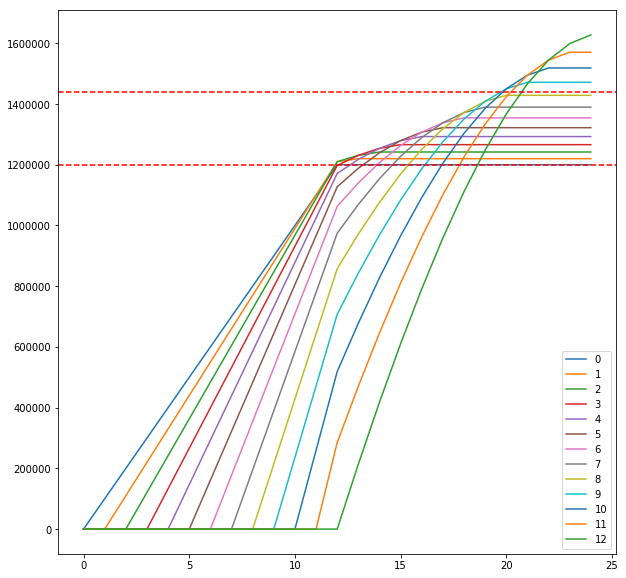

In [33]:
df_cumulative_collections.plot(figsize=(10,10))
plt.axhline(1.2*10**6, ls = 'dashed', c='r')
plt.axhline((1.2**2)*10**6, ls = 'dashed', c='r')

- From our chart, we can see that to reach the two-year target return, we'd need to reinvest at least 9 times